# Malaria in Africa 

> Malaria, a disease spread by the Anopheles mosquito, remains a significant health challenge, particularly in the tropical regions near the equator. Among the most severely affected areas are African countries, where this disease has claimed numerous lives. The epidemic has proven difficult to control due to the underdevelopment and lack of infrastructure in these regions. Frequent outbreaks have led to high mortality rates, exacerbated by environmental conditions that facilitate the rapid breeding and spread of the Anopheles mosquito.
Efforts have been made by governments and international organizations to raise awareness and provide assistance, especially in the hardest-hit regions. This project aims to explore various aspects of malaria in Africa, including its incidence, the reported cases, and the impact of population distribution and access to basic services on the spread and control of the disease. Through data analysis and visualization, we seek to shed light on the dynamics of malaria and the efforts being undertaken to combat this devastating epidemic.

# # Importing Libraries 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as  plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import folium

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/malaria-in-africa/DatasetAfricaMalaria.csv


### Loading the file

In [2]:
data_df = pd.read_csv("/kaggle/input/malaria-in-africa/DatasetAfricaMalaria.csv")
data_df.head(5)

,Country Name,Year,Country Code,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,Use of insecticide-treated bed nets (% of under-5 population),Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),People using safely managed drinking water services (% of population),"People using safely managed drinking water services, rural (% of rural population)",...,Urban population growth (annual %),People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),"People using at least basic sanitation services, rural (% of rural population)","People using at least basic sanitation services, urban (% of urban population)",latitude,longitude,geometry
0,Algeria,2007,DZA,0.01,26.0,NaN,NaN,NaN,NaN,NaN,...,2.71,91.68,85.83,94.78,85.85,76.94,90.57,28.033886,1.659626,POINT (28.033886 1.659626)
1,Angola,2007,AGO,286.72,1533485.0,18.0,29.8,1.5,NaN,NaN,...,5.01,47.96,23.77,65.83,37.26,14.00,54.44,-11.202692,17.873887,POINT (-11.202692 17.873887)
2,Benin,2007,BEN,480.24,0.0,NaN,NaN,NaN,NaN,NaN,...,4.09,63.78,54.92,76.24,11.80,4.29,22.36,9.307690,2.315834,POINT (9.307689999999999 2.315834)
3,Botswana,2007,BWA,1.03,390.0,NaN,NaN,NaN,NaN,NaN,...,4.80,78.89,57.60,94.35,61.60,39.99,77.30,-22.328474,24.684866,POINT (-22.328474 24.684866)
4,Burkina Faso,2007,BFA,503.80,44246.0,NaN,NaN,NaN,NaN,NaN,...,5.91,52.27,45.13,76.15,15.60,6.38,46.49,12.238333,-1.561593,POINT (12.238333 -1.561593)


## File Exploration

In [3]:
data_df.shape

(594, 27)

In [4]:
# Number of missing values in the columns
data_df.isnull().sum()

Country Name                                                                                 0
Year                                                                                         0
Country Code                                                                                 0
Incidence of malaria (per 1,000 population at risk)                                         44
Malaria cases reported                                                                      44
Use of insecticide-treated bed nets (% of under-5 population)                              462
Children with fever receiving antimalarial drugs (% of children under age 5 with fever)    472
Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)      488
People using safely managed drinking water services (% of population)                      495
People using safely managed drinking water services, rural (% of rural population)         506
People using safely managed drinking water service

In [5]:
# Dropping columns with significant missing data (450+)

data_df.drop(columns =['Use of insecticide-treated bed nets (% of under-5 population)'],axis=1, inplace=True)
data_df.drop(columns =['Children with fever receiving antimalarial drugs (% of children under age 5 with fever)'],axis=1, inplace=True)
data_df.drop(columns =['Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)'],axis=1, inplace=True)                            
data_df.drop(columns =['People using safely managed drinking water services (% of population)'],axis=1, inplace=True)
data_df.drop(columns =['People using safely managed drinking water services, rural (% of rural population)'],axis=1, inplace=True)
data_df.drop(columns =['People using safely managed drinking water services, urban (% of urban population)'],axis=1, inplace=True)
data_df.drop(columns =['People using safely managed sanitation services (% of population)'],axis=1, inplace=True)
data_df.drop(columns =['People using safely managed sanitation services, rural (% of rural population)'],axis=1, inplace=True)
data_df.drop(columns =['People using safely managed sanitation services, urban  (% of urban population)'],axis=1, inplace=True)

In [6]:
data_df.columns

Index(['Country Name', 'Year', 'Country Code',
       'Incidence of malaria (per 1,000 population at risk)',
       'Malaria cases reported', 'Rural population (% of total population)',
       'Rural population growth (annual %)',
       'Urban population (% of total population)',
       'Urban population growth (annual %)',
       'People using at least basic drinking water services (% of population)',
       'People using at least basic drinking water services, rural (% of rural population)',
       'People using at least basic drinking water services, urban (% of urban population)',
       'People using at least basic sanitation services (% of population)',
       'People using at least basic sanitation services, rural (% of rural population)',
       'People using at least basic sanitation services, urban  (% of urban population)',
       'latitude', 'longitude', 'geometry'],
      dtype='object')

In [7]:
unique_countries = data_df['Country Name']. unique()
unique_countries

array(['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic',
       'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       "Cote d'Ivoire", 'Djibouti', 'Egypt, Arab Rep.',
       'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon',
       'Gambia, The', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya',
       'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia',
       'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal',
       'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa',
       'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda',
       'Zambia', 'Zimbabwe'], dtype=object)

## Visualizing the Data 

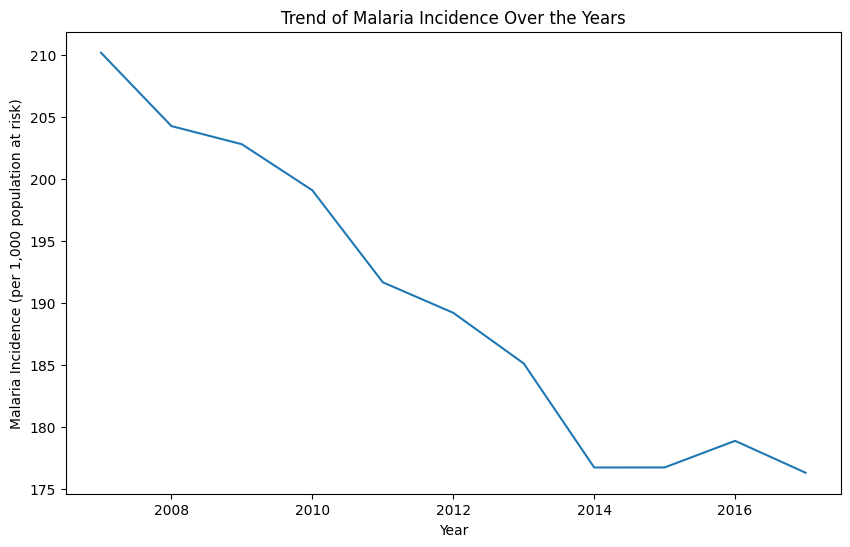

In [8]:
malaria_trend = data_df.groupby('Year')['Incidence of malaria (per 1,000 population at risk)'].mean()

# Plot the trend
plt.figure(figsize=(10, 6))
malaria_trend.plot()
plt.title('Trend of Malaria Incidence Over the Years')
plt.xlabel('Year')
plt.ylabel('Malaria Incidence (per 1,000 population at risk)')
plt.show()

                                                    Incidence of malaria (per 1,000 population at risk)  \
Incidence of malaria (per 1,000 population at r...                                           1.000000     
People using at least basic drinking water serv...                                          -0.410028     
People using at least basic sanitation services...                                          -0.512391     

                                                    People using at least basic drinking water services (% of population)  \
Incidence of malaria (per 1,000 population at r...                                          -0.410028                       
People using at least basic drinking water serv...                                           1.000000                       
People using at least basic sanitation services...                                           0.778722                       

                                                    People using at le

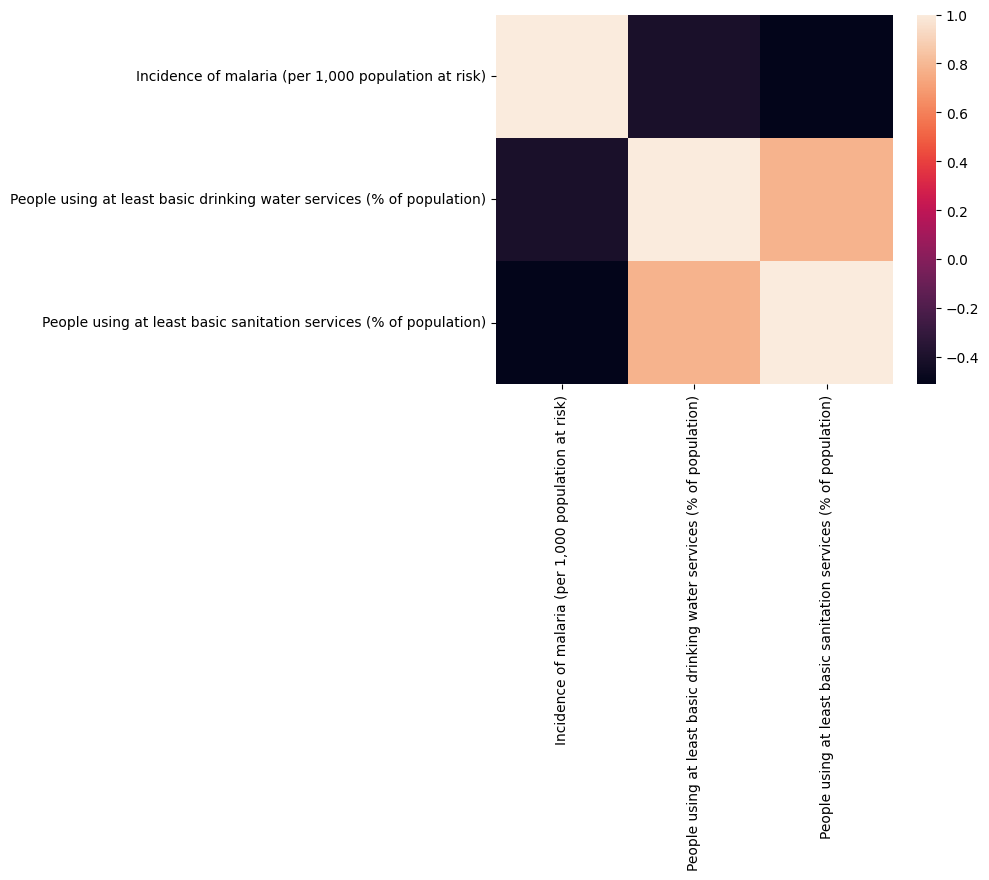

In [9]:
correlation_matrix = data_df[['Incidence of malaria (per 1,000 population at risk)',
                         'People using at least basic drinking water services (% of population)',
                         'People using at least basic sanitation services (% of population)']].corr()

print(correlation_matrix)

# plotting the correlation
sns.heatmap(correlation_matrix)
plt.show()

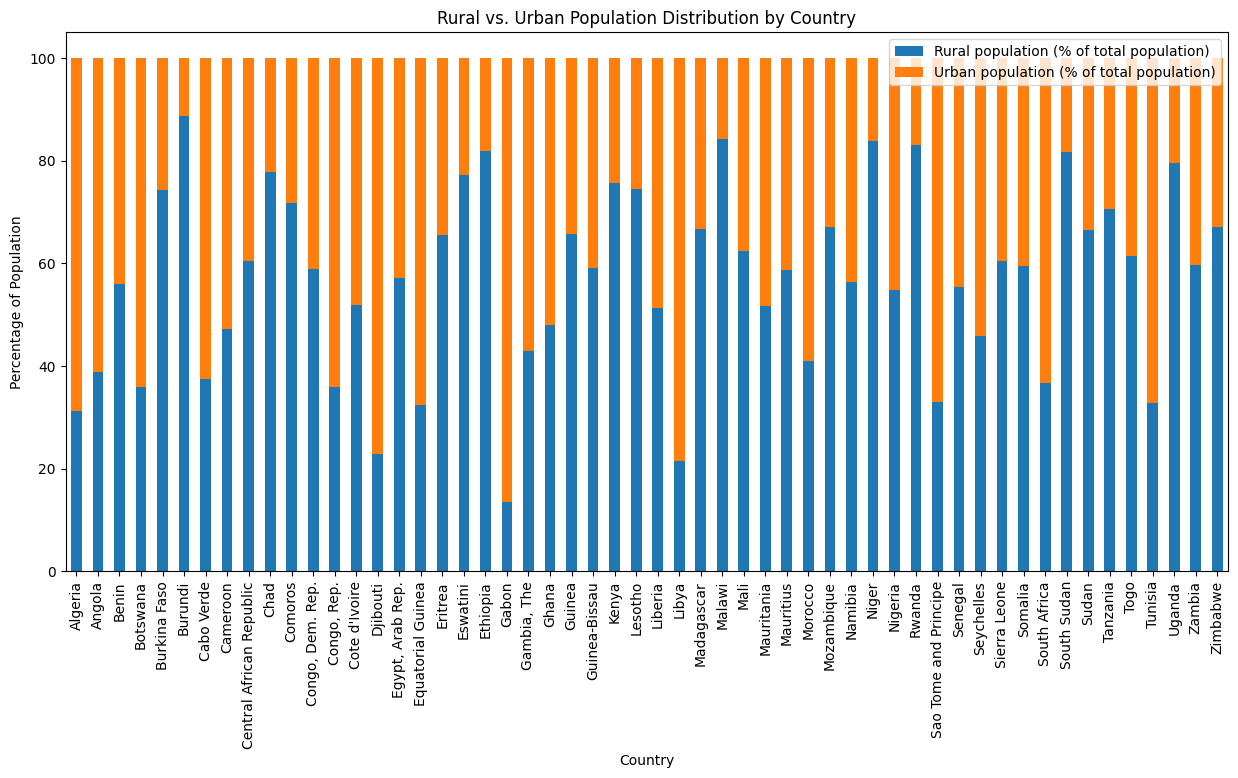

In [10]:
# Group by 'Country Name' and calculate mean rural and urban population percentages
population_distribution = data_df.groupby('Country Name')[['Rural population (% of total population)', 'Urban population (% of total population)']].mean()

# Plot the distribution
population_distribution.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.title('Rural vs. Urban Population Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Percentage of Population')
plt.legend(loc='upper right')
plt.show()


In [11]:
# Creating a base map
m = folium.Map(location=[data_df['latitude'].mean(), data_df['longitude'].mean()], zoom_start=2)

# Add points to the map with malaria incidence as a popup
for idx, row in data_df.iterrows():
    folium.CircleMarker(location=[row['latitude'], row['longitude']],
                        radius=5,
                        popup=f"Country: {row['Country Name']}\nMalaria Incidence: {row['Incidence of malaria (per 1,000 population at risk)']}",
                        color='red',
                        fill=True).add_to(m)
# viewing the map
m